# Online Shoppers

#### Introduction

In physical retailing, a salesperson can offer a range of customized alternatives to shoppers based on the experience he or she has gained over time. This experience has an important influence on the effective use of time, purchase conversion rates, and sales. Many e-commerce and information technology companies invest in early detection and behavioral prediction systems which imitate the behavior of a salesperson in virtual shopping environment. In parallel with these efforts, some academic studies addressing the problem from different perspectives using machine learning methods have been proposed. While some of these studies deal with categorization of visits based on the user’s navigational patters, others aim to predict the behavior of users in real time and take actions accordingly to improve the shopping cart abandonment and purchase conversion rates.

For a more detailed review on this topic we suggest to read:

[1] Okan Sakar et al. Real-time prediction of online shoppers purchasing intention using multilayer perceptron and LSTM recurrent neural networks. DOI:10.1007/s00521-018-3523-0



#### Dataset Description
Here, The purchasing intention model is designed as a binary classification problem measuring the user’s intention to finalize the transaction. The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period. Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.


Classification of attributes:
  - Categorical:
    - Nominal: TrafficType, Region, VisitorType, Browser, OperatingSystem
    - Ordinary: SpecialDays
    - Dicotomic or binary: Weekend, Revenue 
  - Numerical: 
    - Continuos: Administrative_Duration,Informational_Duration, ProductRelated_Duration, BounceRates, ExitRates, PageValues 
    - Discrete: Administrative, Informational, ProductRelated
  - Date: Month

"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" y "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.

The ‘‘Bounce Rate,’’ ‘‘Exit Rate,’’ and ‘‘Page Value’’ features shown in Table 1 represent the metrics measured by ‘‘Google Analytics’’ for each page in the e-commerce site.

- The value of ‘‘Bounce Rate’’ feature for a Web page refers to the percentage of visitors who enter the site from that page and then leave (‘‘bounce’’) without triggering any other requests to the analytics server during that session.

- The value of ‘‘Exit Rate’’ feature for a specific Web page is calculated as for all pageviews to the page, the percentage that were the last in the session.

- The ‘‘Page Value’’ feature represents the average value for a Web page that a user visited before completing an e-commerce transaction. Page Value is the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both). This value is intended to give you an idea of which page in your site contributed more to your site's revenue. If the page wasn't involved in an ecommerce transaction for your website in any way, then the Page Value for that page will be $0 since the page was never visited in a session where a transaction occurred.

- The ‘‘Special Day’’ feature indicates the closeness of the site visiting time to a specific special day (e.g., Mother’s Day, Valentine’s Day) in which the sessions are more likely to be finalized with transaction

- El valor "Special Day" indica la proximidad entre la fecha de visita y el día especial mas cercano. 

The dataset includes features such as "OperatingSystem", "Browser", "Region", "TrafficType", "VisitorType", "Weekend" (of bool type) and "Month". Finally "Revenue" (bool type), which is the *target value*.


In [1]:
# Centrado de gráficas
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

# Haciendo que despliegue todas las imágenes sin scroll.

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')

### Algunas preguntas a responder.

- ¿Puede la probabilidad de compra extraída a través del análisis de los datos representar la probabilidad "real" de compra en un sitio web?
- ¿Con qué precisión podemos predecir que un cliente va a realizar una compra?
- ¿Qué factores conducen a una compra?
- ¿Hay regiones mas proclives al shopping online? 
- ¿Cuán rápido compramos? (visitante nuevo/recurrente) 
- ¿En que momento de la semana compramos? 
- ¿Qué páginas visitan y qué tiempo dedican a ellas antes de salir?

## EDA

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# Visualizando el tipo de datos y la presencia de valores Null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
# Estadística básica descriptiva.
df.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


##### Conlusión.

- Todas las "...Duration" claramente tienen outliers al igual que "BounceRates", "ExitRates", "SpecialDay".
- El mes de Mayo tiene el mayor número de visitas y el revenue False es el valor mas frecuente. Hay mas visitas durante la semana, pero sería mas justo comparar con las frecuencias diarias y splitearlas (el total de compras en días hábiles habría que dividir por 5 y por 2 en el caso de las compras del fin de semana).
- No están lo meses de Enero ni Abril.
- Los usuarios pasan mucho mas tiempo en páginas relacionadas al producto que en el resto con un promedio de ~20 min.

### Frequency Plots

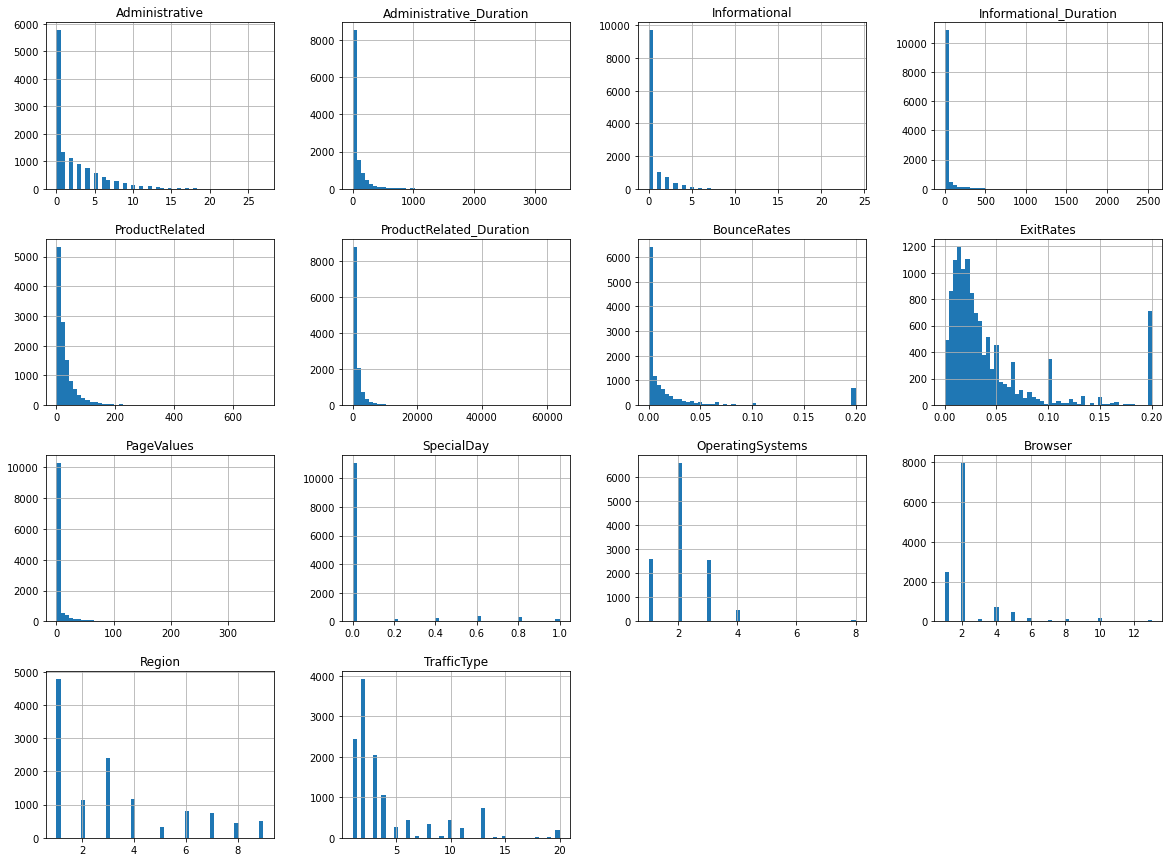

In [8]:
df.hist(bins=50, figsize=(20,15))
plt.show()

#### <ins>Revenue vs Weekends</ins>

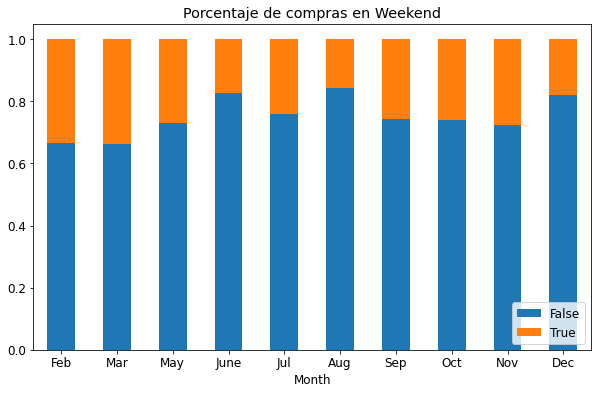

In [9]:
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams.update({'font.size': 12})
temp = df[df.Revenue == True].groupby('Month').Weekend.value_counts(normalize=True) 
temp = temp.unstack('Weekend')
meses = ['Feb', 'Mar', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp = temp.reindex(meses)
temp.plot(kind='bar', stacked=True, rot=0, title='Porcentaje de compras en Weekend')
plt.legend(loc='lower right')
plt.show()

In [10]:
temp.describe()

Weekend,False,True
count,10.000000,10.000000
mean,0.751060,0.248940
std,0.062762,0.062762
min,0.661458,0.157895
25%,0.724955,0.196023
50%,0.741658,0.258342
75%,0.803977,0.275045
max,0.842105,0.338542


##### Conclusión
- El porcentaje de compras los fines de semana es de un ~(25 +/- 6)% se mantiene bastante homogéneo durante el año (no cambia la conducta de los usuarios). 
- En contra de mi intuición hay una ligera tendencia a comprar los días de semana (en el caso de haber tenido consumidores indiferentes hubiera dado 5/7).

#### <ins>SpecialDay vs Month</ins>

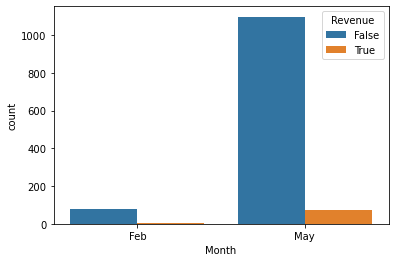

In [11]:
plt.rcParams['figure.figsize'] = [6, 4]
plt.rcParams.update({'font.size': 10})
ax = sns.countplot(x='Month', hue='Revenue', data = df[df.SpecialDay != 0])


In [12]:
tmp = df.copy()
tmp.SpecialDay = np.where(tmp.SpecialDay != 0, True, False)
tmp[(tmp.Month == 'Feb') | (tmp.Month == 'May')].groupby(['Month', 'SpecialDay']).Revenue.value_counts().unstack('Month')

Month               Feb   May
SpecialDay Revenue           
False      False    104  1902
           True       1   290
True       False     77  1097
           True       2    75

##### Conclusión
- El SpecialDay no es un feature que mueva el amperímetro en el volumen de ventas. 
- Hay solo dos meses con SpecialDay. ¿Qué definición tienen de días especiales?
- Solo uno de ellos (Mayo) genera diferencias significativas en el volumen de visitas.
- Del total de ventas de Mayo el ~20% se da en SpecialDay.
- Del total de visitas de Mayo el ~35% se da en SpecialDay.


#### <ins>Revenue vs Months</ins>

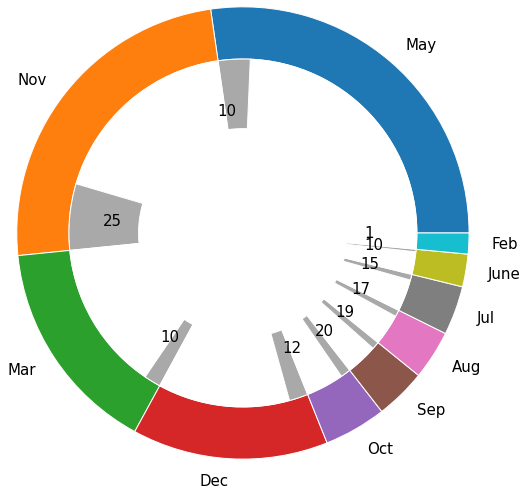

In [13]:
# Viendo un diagrama de torta de cantidad de visitas y compras exitosas por meses.
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 15})

index = df.Month.value_counts().index
revenue = df.groupby("Revenue").Month.value_counts()
true_revenue, false_revenue = [revenue[True][key] for key in index], [revenue[False][key] for key in index]
true_percentage = [int(100*revenue[True][key]/(revenue[True][key]+revenue[False][key])) for key in index]

# Make data: I have 3 groups and 7 subgroups
group_size = df.Month.value_counts().values
subgroup_size = list(itertools.chain.from_iterable(zip(false_revenue, true_revenue)))
subgroup_label = list(itertools.chain.from_iterable(zip([None]*10, true_percentage)))
color = ['w', '#A9A9A9']*10

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=index)
plt.setp(mypie, width=0.3, edgecolor='white')
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, labels=subgroup_label, radius=1.3-0.3, labeldistance=0.7, colors=color)
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)


# show it
plt.show()

El anillo externo reprensenta los meses de mayor número de vistas y el anillo interno la tasa de éxito normalizada al número de visitas de ese mes. 
Probablemente sea mas interesante ver el número de ventas (quizás sea 
preferible tener mas visitas y menor porcentaje de éxito de venta pero mayor revenue total a largo del mes):

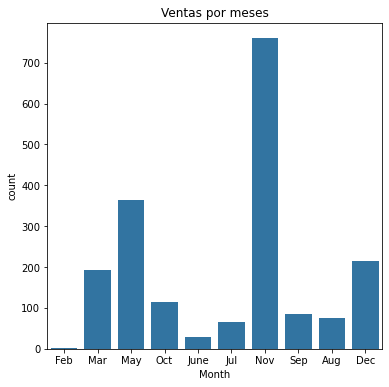

In [14]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 10})
sns.countplot(x='Month', hue='Revenue', data = df[df.Revenue == True])
plt.title('Ventas por meses')
plt.legend().remove()

##### Conlusión.

- El mes de mayor volumen de ventas en Noviembre. ¿La gente se anticipa a comprar regalos navideños?
- El mes de mayor volumen de visitas es Mayo, lo cual es esperable ya que el/los días especiales tienen un fuerte impacto en el número de visitas en este mes. No obstante, esto disminuye la tasa éxito (quedando similar al promedio anual ~10%) ya que los días espaciales no modifican mayormente el número de ventas.
- Hay bastante dispersión en la tasa de éxito según los meses.


#### <ins> Revenue vs VisitorType</ins>

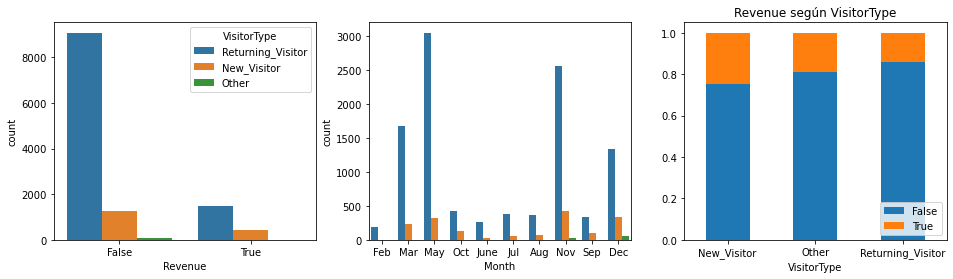

In [15]:
plt.rcParams['figure.figsize'] = [16 , 4]
plt.rcParams.update({'font.size': 10})

fig = plt.figure()
ax1 = fig.add_subplot(131)
ax1 = sns.countplot(x='Revenue', hue='VisitorType', data = df)

ax2 = fig.add_subplot(132)
ax2 = sns.countplot(x='Month', hue='VisitorType', data = df)
ax2.get_legend().remove()

ax3 = fig.add_subplot(133)
temp = df.groupby('VisitorType').Revenue.value_counts(normalize=True) 
temp = temp.unstack('Revenue')
temp.plot(ax= ax3, kind='bar', stacked=True, rot=0, title='Revenue según VisitorType')
plt.legend(loc='lower right')
plt.show()

##### Conlusión.

- El feature Returning_Visitor es el más frecuente durante todo el año en especial en Marzo, Mayo, Noviembre y Diciembre.
- La mayor parte de las ventas provienen de ese mismo grupo.
- La tasa de éxito en las ventas es mayor en visitantes nuevos.

#### <ins> Revenue vs Region</ins>

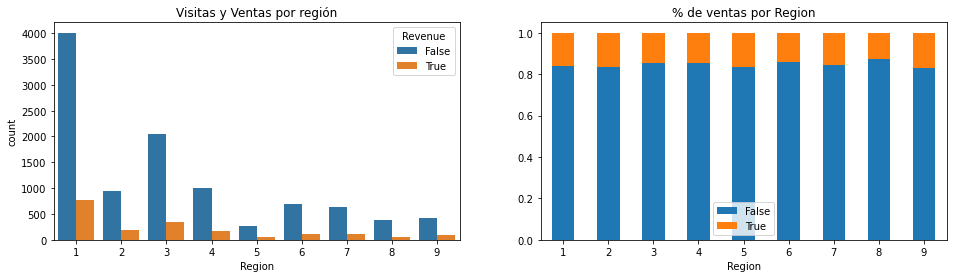

In [16]:
plt.rcParams['figure.figsize'] = [16 , 4]
plt.rcParams.update({'font.size': 10})
fig = plt.figure()
ax1 = fig.add_subplot(121)
sns.countplot(x='Region', hue='Revenue', data = df)
plt.title('Visitas y Ventas por región')

ax2 = fig.add_subplot(122)
temp = df.groupby('Region').Revenue.value_counts(normalize=True) 
temp = temp.unstack('Revenue')
temp.plot(ax= ax2, kind='bar', stacked=True, rot=0, title='% de ventas por Region')
plt.legend(loc='lower center')
plt.show()

##### Conlusión.

- El volumen de participación de la región 1 es mucho mayor.
- El porcentage de éxito es homogéneo. No es una cuestión cultural de comprar o no comprar por la web.

#### <ins> Revenue vs PageValues</ins>

Creo 4 categorías de PageValues de forma tal que el número de usuarios se distribuya de forma mas o menos equitativa entre cada categoría.

- Categoría 1: usuarios entre 0-7 páginas visitadas.
- Categoría 2: usuarios entre 8-18 páginas visitadas.
- Categoría 3: usuarios entre 18-36 páginas visitadas.
- Categoría 4: usuarios con mas de 36 páginas visitadas.

In [30]:
df["Discrete_PageValue"] = pd.cut(df["PageValues"],
                                  bins=[0, 7, 17, 36, np.inf],
                                  labels=[1, 2, 3, 4])

df.Discrete_PageValue.value_counts()

2    723
3    686
1    663
4    658
Name: Discrete_PageValue, dtype: int64

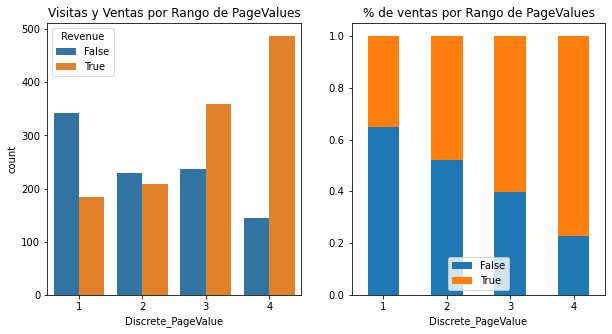

In [165]:
df["Discrete_PageValue"] = pd.cut(df["PageValues"],
                                  bins=[0., 7, 14, 32, np.inf],
                                  labels=[1, 2, 3, 4])

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
sns.countplot(x='Discrete_PageValue', hue='Revenue', data = df)
plt.title('Visitas y Ventas por Rango de PageValues')

ax2 = fig.add_subplot(122)
temp = df.groupby('Discrete_PageValue').Revenue.value_counts(normalize=True) 
temp = temp.unstack('Revenue')
temp.plot(ax= ax2, kind='bar', stacked=True, rot=0, title='% de ventas por Rango de PageValues')
plt.legend(loc='lower center')
plt.show()


In [143]:
temp

Revenue,False,True
Discrete_PageValue,,
1,0.649621,0.350379
2,0.516008,0.483992
3,0.371330,0.628670
4,0.218018,0.781982


#### <ins>CountPlots de las demás</ins>

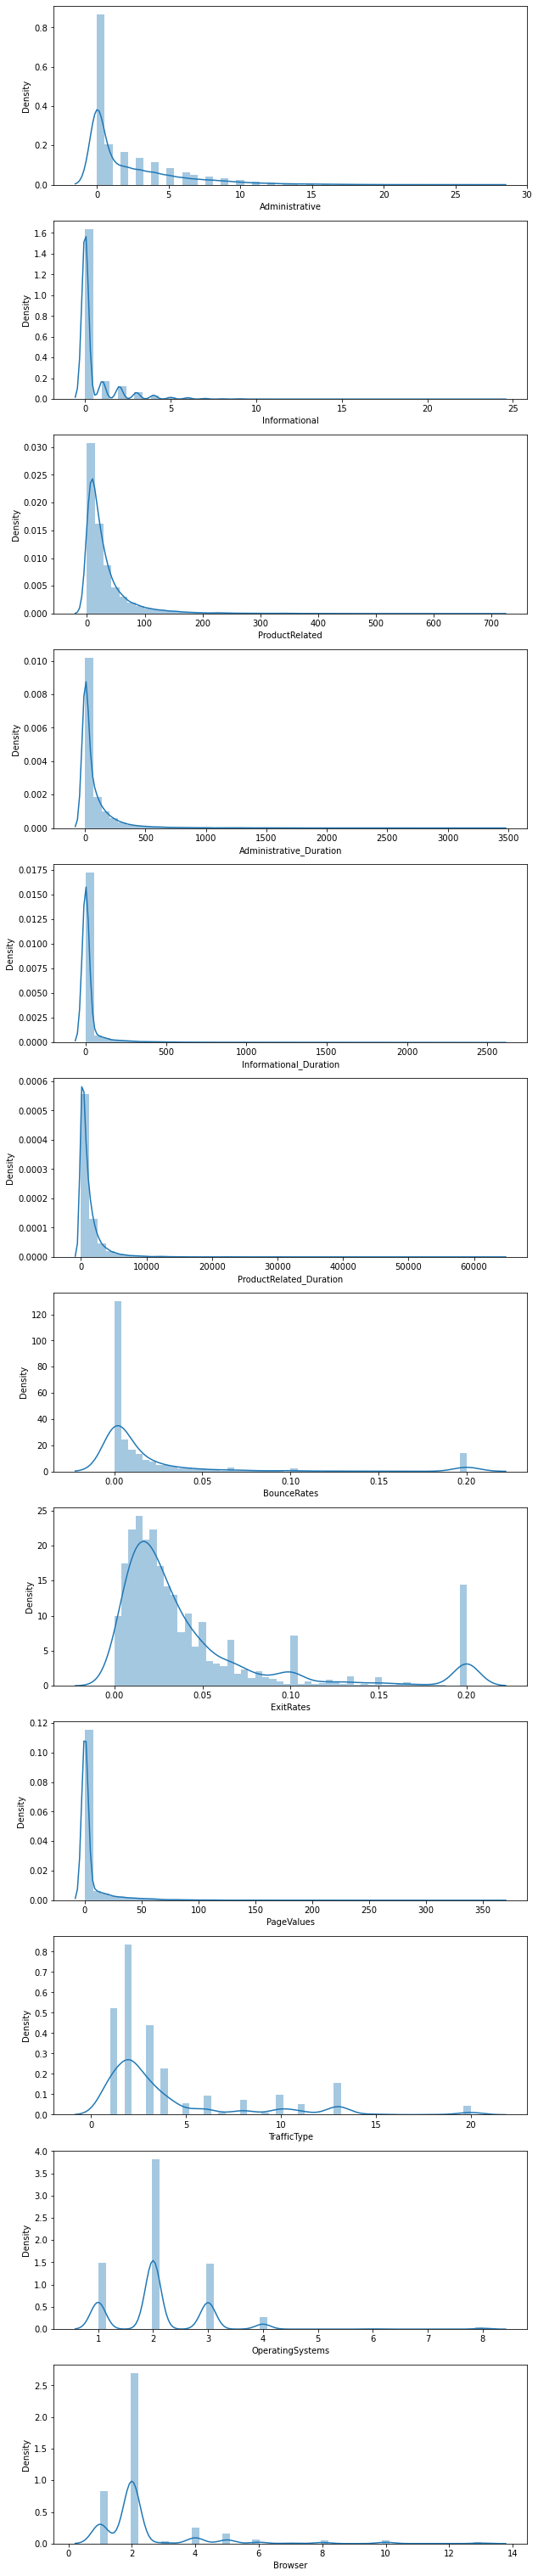

In [32]:
numerical = ['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration', 'Informational_Duration', 
             'ProductRelated_Duration','BounceRates', 'ExitRates', 'PageValues', 'TrafficType', 'OperatingSystems', 'Browser']

fig, ax = plt.subplots(len(numerical), figsize=(10,55))

for i, col in enumerate(numerical):
    sns.distplot(df[col], hist=True, ax=ax[i]) # change to rev_true

plt.show()

##### Conlusión.

- Administrative, Informative, PageValues tienen el recuento más alto en 0.
- ProductRelated no tiene valores extremos.
- La mayoría de los usuarios usaron el sistemas operativo 2. ¿Mayor compras desde celular (Android)?
- Las pag_Durantion, BounceRates y ExitRates parecieran tiener distribuciones de Poisson. 
- En BounceRates, ExitRates hay outliers, pueden ser que estén truncando y sumando valores superiores al corte y ubicándolos en el cutoff.

#### Variable no categórica según Revenue

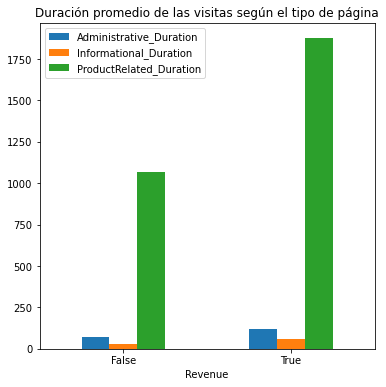

In [33]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams.update({'font.size': 10})

temp = df.groupby('Revenue')['Administrative_Duration', 'Informational_Duration','ProductRelated_Duration'].mean()
temp.plot(kind='bar', rot=0, title='Duración promedio de las visitas según el tipo de página')
plt.show()

##### Conlusión.

- Los visitantes emplean la mayor parte del tiempo en páginas relacionadas al producto.
- Para el caso de visitantes que deciden comprar el tiempo en estas páginas aumenta.
- Claramente las visitas no emplean tiempo en páginas administrativas ni de información.

### Splitting the data


In [34]:
set(df.Month)

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Revenue']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
    
print(strat_test_set['Revenue'].value_counts() / len(strat_test_set))
print(df['Revenue'].value_counts() / len(df))

False    0.845093
True     0.154907
Name: Revenue, dtype: float64
False    0.845255
True     0.154745
Name: Revenue, dtype: float64


In [35]:
df = strat_train_set.copy()

### Correlación de Pearson

There are several types of correlation coefficients but the one that is most common is the Pearson correlation r. It is a parametric test that is only recommended when the variables are normally distributed and the relationship between them is linear. Otherwise, non-parametric Kendall and Spearman correlation tests should be used.

Análisis de correlación de Pearson entre atributos numéricos. Estrictamente hablando por lo que se vio anteriormente las variables no están normalmente distribuidas y tampoco tenemos asegurada una relación lineal entre ellas por lo que no necesariamente person será una buena medida de correlación entre variables.

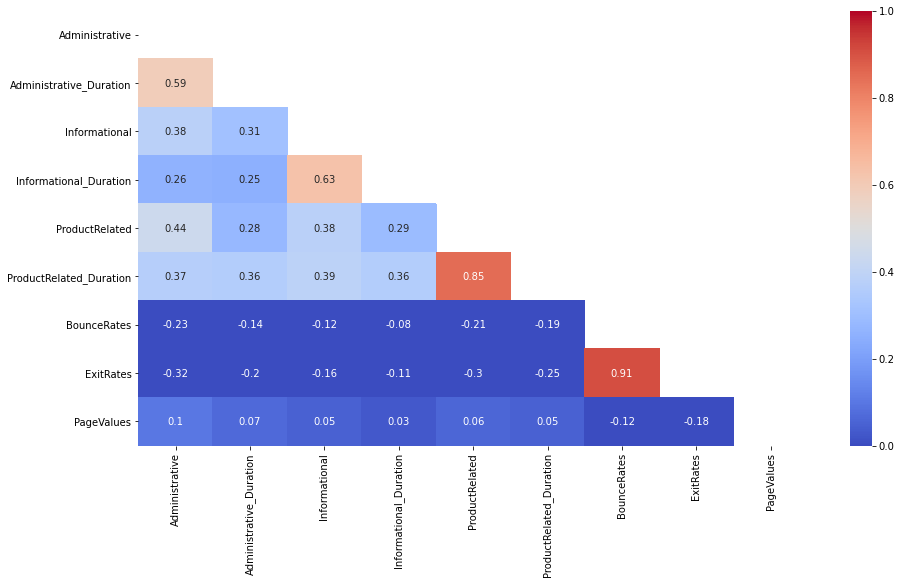

In [54]:
#Selección de atributos numéricos
numerical = ['Administrative', 'Administrative_Duration', 'Informational',
             'Informational_Duration', 'ProductRelated','ProductRelated_Duration', 
             'BounceRates', 'ExitRates','PageValues']

#Análisis de correlación
corr_per = df[numerical].corr().round(2)
mask = np.zeros_like(corr_per, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,8))
sns.heatmap(corr_per, annot=True, mask=mask, vmin=0, vmax=1, cmap="coolwarm")
plt.show()

##### Conlusión.

- Como era esperable hay una correlación relativamente alta entre los tipos de páginas ( 'Administrative','Informational', 'ProductRelated') y sus respectivas durations y entre BounceRate y ExitRate.
- Es probable que las features mas relevantes para predecir el Revenue sean una combinación de ProductRelated y ProductDuration, el ExitRate, y PageValues.

### Correlación de Spearman 
Análisis de correlación de Spearman para variables numéricas y binarias. La correlación de Spearman tiene mas sentido de ser analizada puesto que muestra una relación de monotonía entre las variables. A mayor número de páginsa visitadas


<AxesSubplot:>

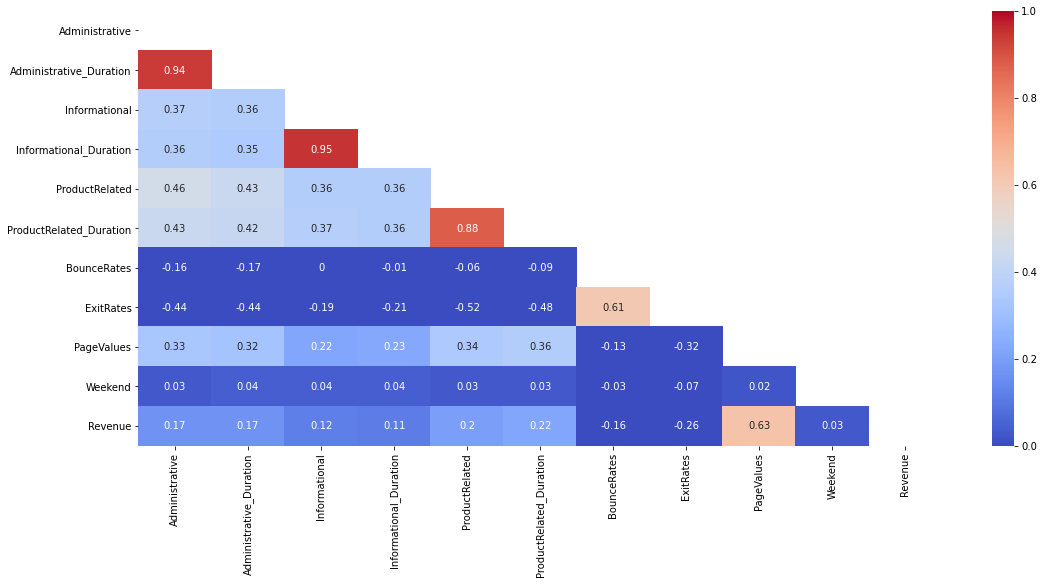

In [55]:
#Análisis de correlación Spearman
#Atributos numéricos más Revenue y Weekend
df_nRev = pd.concat([df[numerical], df[['Weekend', 'Revenue']]], axis=1) 

corr_sp = df_nRev.corr(method='spearman').round(2)
mask = np.zeros_like(corr_sp, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,8))
sns.heatmap(corr_sp, annot=True, mask=mask, vmin=0, vmax=1, cmap="coolwarm")

### Correlación de Kendall


<AxesSubplot:>

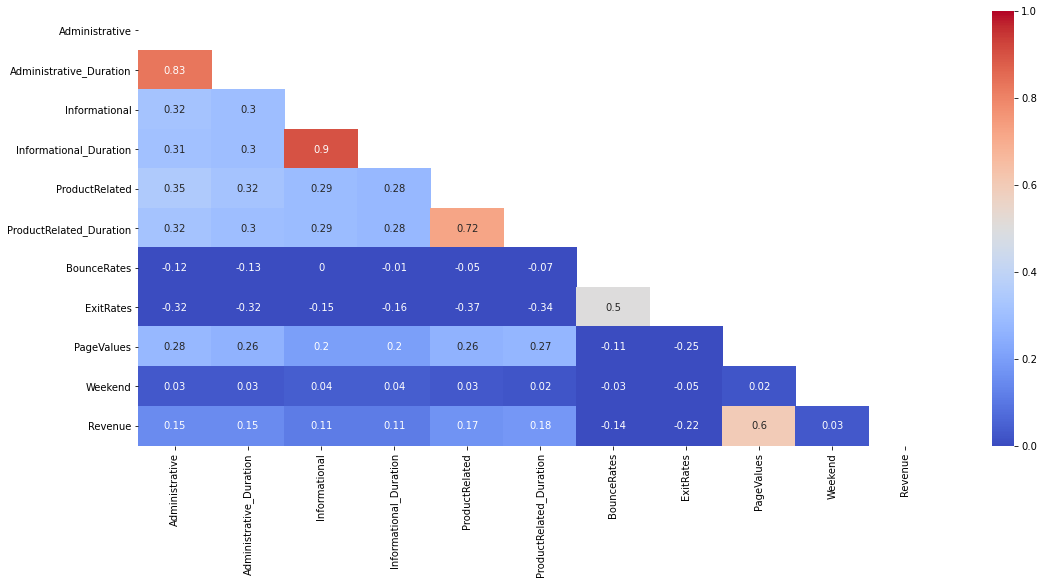

In [56]:
corr_sp = df_nRev.corr(method='kendall').round(2)
mask = np.zeros_like(corr_sp, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(18,8))
sns.heatmap(corr_sp, annot=True, mask=mask, vmin=0, vmax=1, cmap="coolwarm")

##### Conlusión.

Reafirma las conclusiones anteriores, pero es un test mas adecuado para algunos pares de variables (como por ejemplos los tipos de páginas y sus respectivos Duration) y por eso de hecho mejora una poco, mostrando más correlación.

Por tanto parece sensato definir una nueva variable: la duración por página.

## OJO aca habria que hacer un ttest para ver que posta hay una relacion y que no es producto de la muestra

In [231]:
# Calculo la duración por página.

df.loc[:,'Adm_dpp'] = np.where(df.Administrative_Duration==0,0, df.Administrative_Duration / df.Administrative).round(2)
df.loc[:,'Inf_dpp'] = np.where(df.Informational_Duration==0,0, df.Informational_Duration/df.Informational).round(2)
df.loc[:,'Pro_dpp'] = np.where(df.ProductRelated_Duration==0,0, df.ProductRelated_Duration/df.ProductRelated).round(2)

cols = ['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration','Informational_Duration', 
        'ProductRelated_Duration']

# Elimino las features sobrantes.
df = df.drop(cols, axis=1)

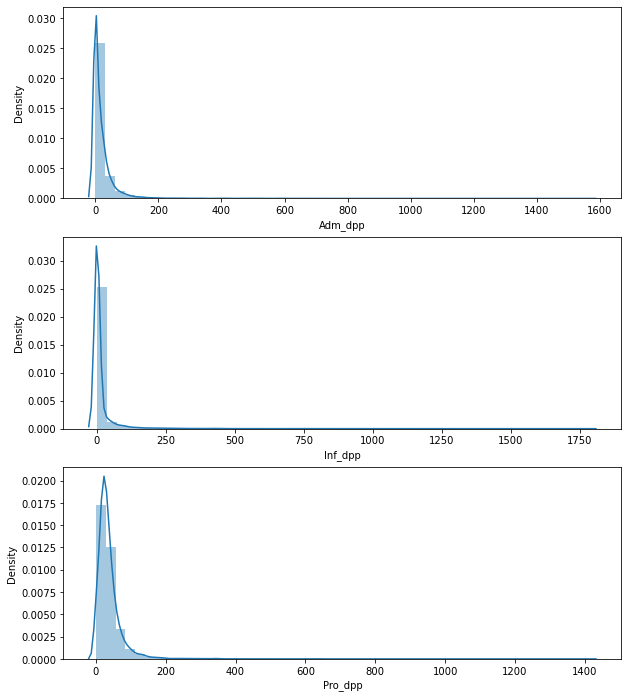

In [232]:
numerical = ['Adm_dpp', 'Inf_dpp', 'Pro_dpp']

fig, ax = plt.subplots(3, figsize=(10,12))

sns.distplot(df['Adm_dpp'], hist=True, ax=ax[0]) # change to rev_true
sns.distplot(df['Inf_dpp'], hist=True, ax=ax[1])
sns.distplot(df['Pro_dpp'], hist=True, ax=ax[2])

plt.show()

In [233]:
ncol = df.shape[0]

df = df[df['Pro_dpp'] < 200]
df = df[df['Inf_dpp'] < 200]
df = df[df['Adm_dpp'] < 200]

df.shape[0]/ncol

0.9687753446877534

Testeando de nuevo para estas variables

<AxesSubplot:>

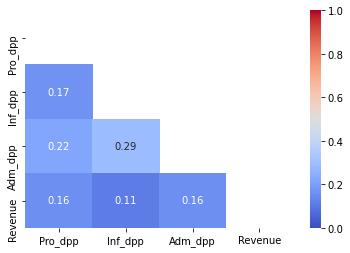

In [240]:
df_nRev = df[['Pro_dpp', 'Inf_dpp', 'Adm_dpp', 'Revenue']]

corr_sp = df_nRev.corr(method='spearman').round(2)
mask = np.zeros_like(corr_sp, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(6,4))
sns.heatmap(corr_sp, annot=True, mask=mask, vmin=0, vmax=1, cmap="coolwarm")

### Análisis estadístico Chi cuadrado entre atributos categóricos:


#### Analicé las relaciones entre revenue y el resto de los atributos categóricos, podría haber analizado todos los pares.

In [60]:
# Chi square
from scipy.stats import chi2_contingency

categorical = ['SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

df_c = df[categorical]

p_chi = pd.Series(name='p_value')
for feature in categorical:
   _,p_chi[feature],_,_ = chi2_contingency(pd.crosstab(df['Revenue'], df_c[feature]))

p_chi


<ipython-input-60-a8e50961ce52>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  p_chi = pd.Series(name='p_value')


SpecialDay          3.974091e-17
Month               1.252308e-55
OperatingSystems    2.260085e-11
Browser             4.057668e-03
Region              8.138419e-01
TrafficType         2.187527e-53
VisitorType         2.165550e-23
Weekend             1.924751e-04
Name: p_value, dtype: float64

H0 = Revenue es independiente del atributo *feature*.

H1 = Revenue depende del atributo *feature* .

Si el p value es menor a 0.05 se rechaza la hipótesis nula con un nivel de confianza del 95%.

##### Conlusión.
En este caso solo se puede descartar Región de los atributos categóricos dado que el resto presentaron un p value menor a 0.05.

### Outliers

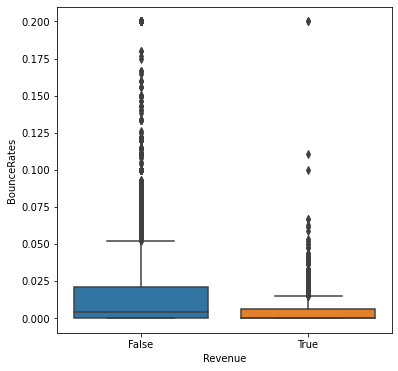

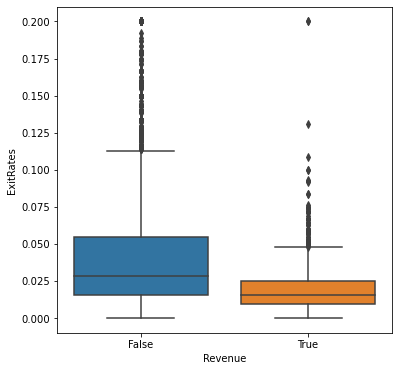

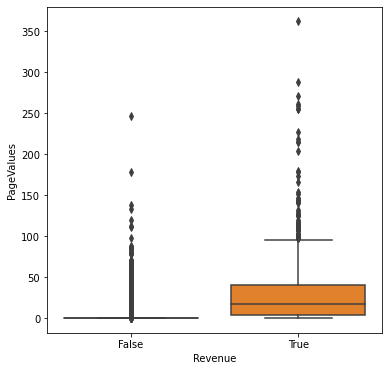

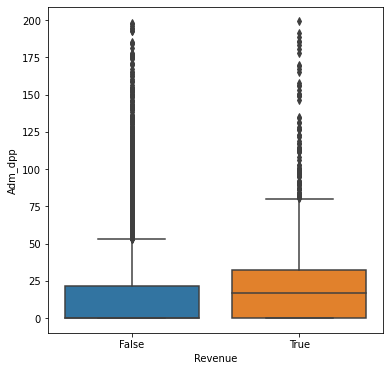

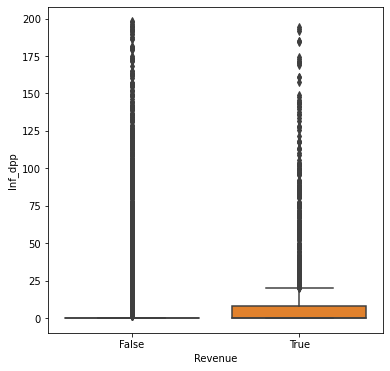

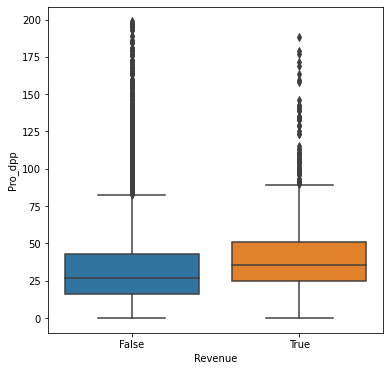

In [61]:
continuous = ['BounceRates', 'ExitRates','PageValues', 'Adm_dpp','Inf_dpp', 'Pro_dpp']

for item in continuous:
    sns.boxplot(x = 'Revenue', y=item, data=df)
    plt.show()

In [63]:
# Rango Intercuartilo
Q1 = df[continuous].quantile(0.25)
Q3 = df[continuous].quantile(0.75)
IQR = Q3 - Q1
df_IQR = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Número de outliers por feature
df_IQR.sum()

Adm_dpp              679
BounceRates         1205
Browser                0
ExitRates            881
Inf_dpp             1747
Month                  0
OperatingSystems       0
PageValues          2097
Pro_dpp              549
Region                 0
Revenue                0
SpecialDay             0
TrafficType            0
VisitorType            0
Weekend                0
dtype: int64

##### Conclusión.

- Hay outliers en todos los features.
- Bounce y ExitRates tienen el IQR mas grande para False revenue. 
- PageValues y Administrative_Duration tienen el IQR mas grande pra True revenue.

### Primeros filtros

Elimino aquellos tiempos de espera exageradamente grandes y PageValues > 65. 

In [27]:
# PageValues
index += list(df[df.PageValues > 65].index)

Me estaría quedando con un ~98% de los datos

In [28]:
df_cleaned = df.drop(index, axis=0)
len(index)/len(df)

0.02133008921330089

Represento los datos de las distintas páginas de una forma más conveniente. 

In [29]:
# Calculo la duración por página.

df_cleaned.loc[:,'Adm_dpp'] = np.where(df_cleaned.Administrative_Duration==0,0, df_cleaned.Administrative_Duration / df_cleaned.Administrative).round(2)
df_cleaned.loc[:,'Inf_dpp'] = np.where(df_cleaned.Informational_Duration==0,0, df_cleaned.Informational_Duration/df_cleaned.Informational).round(2)
df_cleaned.loc[:,'Pro_dpp'] = np.where(df_cleaned.ProductRelated_Duration==0,0, df_cleaned.ProductRelated_Duration/df_cleaned.ProductRelated).round(2)

cols = ['Administrative', 'Informational', 'ProductRelated', 'Administrative_Duration','Informational_Duration', 
        'ProductRelated_Duration']

# Elimino las features sobrantes.
df_cleaned = df_cleaned.drop(cols , axis=1)


In [30]:
# Viendo si esta todo ok.
df_cleaned.isnull().sum()

BounceRates         0
ExitRates           0
PageValues          0
SpecialDay          0
Month               0
OperatingSystems    0
Browser             0
Region              0
TrafficType         0
VisitorType         0
Weekend             0
Revenue             0
Adm_dpp             0
Inf_dpp             0
Pro_dpp             0
dtype: int64

Elimino BounceRate por la alta correlación que tiene con ExitRate y Region por la prueba de chi-square explicada arriba.

In [31]:
df_cleaned = df_cleaned.drop('BounceRates', axis=1)
df_cleaned = df_cleaned.drop('Region', axis=1)

Podría haber eliminado los valores nulos de las duration ya que reprensentan un tiempo pero al desconocer las unidades prefiero no hacerlo. Particularmenete llamativo es que haya revenue con ProductRelated_Duration nulo.

In [32]:
sum(df[(df.ProductRelated_Duration == 0) & (df.ProductRelated == 0)].Revenue)

6

### Agrupamientos

Vamos a agrupar la información de los Browser distintos de 1, 2 a 3.

In [33]:
df_cleaned.loc[ df_cleaned.Browser > 2 , 'Browser'] = 3

Vamos a agrupar la información de los OperatingSystem distintos de 1, 2, 3 a 4.

In [34]:
df_cleaned.loc[ df_cleaned.OperatingSystems > 3, 'OperatingSystems'] = 4

Vamos a agrupar TrafficType < 50 como un único grupo.

In [35]:
df_cleaned.TrafficType.value_counts()

2     3793
1     2433
3     2029
4     1047
13     727
6      439
10     438
8      328
5      256
11     240
20     183
9       41
7       39
15      38
19      17
14      12
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [36]:
index = list(df_cleaned.TrafficType.value_counts()[df_cleaned.TrafficType.value_counts() < 50].index)
df_cleaned.loc[df_cleaned.TrafficType.isin(index), 'TrafficType'] = 9

### Creando las variables Dummies

In [37]:
dummies = ['Browser','TrafficType','VisitorType','Month','OperatingSystems', 'Weekend']
df_dummies = pd.get_dummies(df_cleaned, columns = dummies, drop_first=True)

### Observando Features 

In [38]:
from sklearn.feature_selection import SelectKBest, f_classif
# https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# definiendo las variables dependientes e independientes.
X = df_dummies.drop('Revenue', axis=1)
y = df_dummies.Revenue
nro_componentes = 10

selector = SelectKBest(f_classif, k=nro_componentes)
X_new = selector.fit_transform(X, y)

column_names = [column[0]  for column in zip(X.columns, selector.get_support()) if column[1]]
df_fs = df_dummies[column_names]
column_names

['ExitRates',
 'PageValues',
 'SpecialDay',
 'Adm_dpp',
 'TrafficType_2',
 'TrafficType_3',
 'TrafficType_13',
 'VisitorType_Returning_Visitor',
 'Month_May',
 'Month_Nov']

### Feature Scaling

##### Aca hay un error el scaling debería de fitearse sobre el modelo de train y sobre el modelo test solo debería aplicar transform.

In [39]:
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer
# Habría que pensar con mas detalle cual de todos los escalamientos posibles elegir. 
# Yo escogí QuantileTransformer porque es robusto frente a Outliers.

df_scaled = df_dummies.copy()
#scaler = RobustScaler()
#scaler = QuantileTransformer()
scaler = StandardScaler()

cols = ['Adm_dpp','Inf_dpp','Pro_dpp','PageValues']
scaler.fit_transform(df_scaled[cols].values)
df_scaled[cols] = pd.DataFrame(scaler.transform(df_dummies[cols]), columns=cols)
df_scaled.isnull().values.sum()

984

me genera demasiados null, no tengo tiempo de entender porque, vamos con un método mas artesanal.

##### Debería haber hecho algo así:

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

df_scaled = df_dummies.copy()
x = df_scaled.drop('Revenue', axis=1)
y = df_scaled.Revenue
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
np.count_nonzero(np.isnan(x_test))

0

In [41]:
df_scaled = df_dummies.copy()
df_scaled[cols] = (df_scaled[cols]-df_scaled[cols].mean()) / df_scaled[cols].std()
df_scaled.isnull().values.sum()
#très bien

0

### PCA

##### Aca hubo dos errores uno de cambio de nombre lo que hace que no compilen dos o tres líneas y otro con el shuflle en lugar del random_state = True

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

nro_componentes=12
pca_model = PCA(n_components=nro_componentes)

x = df_scaled.drop('Revenue', axis=1)
y = df_scaled.Revenue

principal_components = pca_model.fit_transform(x)
principalDf = pd.DataFrame(data = principal_components, columns = [f'pc{i}' for i in range(1, nro_componentes+1)])

# Acomodando índices para que no haya null values
principalDf = principalDf.set_index(x.index)
principalDf['Revenue'] = y

principalDf.isnull().values.sum()

0

In [43]:
pca_model.explained_variance_ratio_

array([0.18575296, 0.14718213, 0.14023317, 0.13502878, 0.05186282,
       0.04859239, 0.04708033, 0.03274029, 0.02941164, 0.02629331,
       0.02148408, 0.01969645])

In [44]:
pca_model.singular_values_

array([121.70509268, 108.33490719, 105.74656087, 103.76575363,
        64.30858442,  62.24794172,  61.27179876,  51.09544043,
        48.42844593,  45.78924951,  41.39036797,  39.63098322])

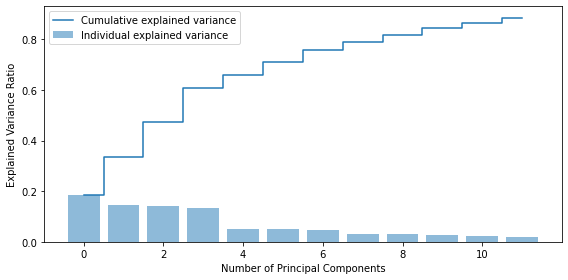

In [45]:
plt.figure(figsize=(8, 4))
plt.bar(range(nro_componentes), pca_model.explained_variance_ratio_, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(nro_componentes), np.cumsum(pca_model.explained_variance_ratio_), where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [46]:
f'Tiene buena pinta con {nro_componentes} componentes explico ~ {int(sum(pca_model.explained_variance_ratio_)*100)}% de la varianza'

'Tiene buena pinta con 12 componentes explico ~ 88% de la varianza'

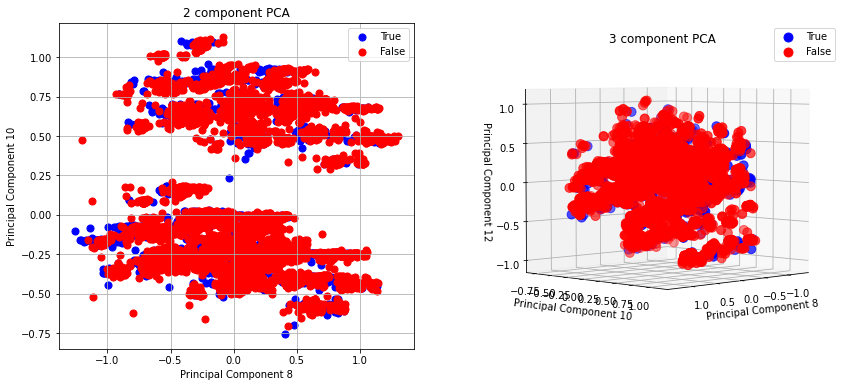

In [47]:
plt.rcParams['figure.figsize'] = [14, 6]
plt.rcParams.update({'font.size': 10})

########1st Plot########
i, j, k = 8,10, 12
fig = plt.figure()
ax = fig.add_subplot(1,2,1) 
ax.set_xlabel(f'Principal Component {i}')
ax.set_ylabel(f'Principal Component {j}')
ax.set_title('2 component PCA', fontsize = 12)
targets = [True, False]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Revenue'] == target
    ax.scatter(principalDf.loc[indicesToKeep, f'pc{i}'], principalDf.loc[indicesToKeep, f'pc{j}'], c = color, s = 50)
ax.legend(targets)
ax.grid()

########2nd Plot########
from mpl_toolkits.mplot3d import Axes3D  

a2x = fig.add_subplot(1,2,2, projection='3d') 
a2x.set_xlabel(f'Principal Component {i}')
a2x.set_ylabel(f'Principal Component {j}')
a2x.set_zlabel(f'Principal Component {k}')
a2x.set_title('3 component PCA', fontsize = 12)
targets, colors = [True, False], ['b', 'r']

for target, color in zip(targets,colors):
    indicesToKeep = principalDf['Revenue'] == target
    a2x.scatter(principalDf.loc[indicesToKeep, f'pc{i}']
               , principalDf.loc[indicesToKeep, f'pc{j}']
               , principalDf.loc[indicesToKeep, f'pc{k}']
               , c = color
               , s = 80)
a2x.legend(targets)
a2x.view_init(4,45)

Pareciera que hubiera un plano pero no logro visualizarlo.

### Linear Model con SVD

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, QuantileTransformer

matrix = df_dummies.copy()
# Pad with ones for nonzero offset in the last col of the matrix
matrix['mean'] = 1

X_train, X_test, y_train, y_test = train_test_split(matrix.drop('Revenue', axis=1)
                                                    ,matrix.Revenue
                                                    ,stratify=matrix.Revenue
                                                    ,shuffle=True) 

scaler = QuantileTransformer()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
np.count_nonzero(np.isnan(x_test))

0

In [49]:
# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(X_train,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y_train

El efecto del Straify es que no me submuestre las poblaciones sino que mantenga las proporciones:

|          | True | False | True/Total |
|  :---:   |:---: |:---:  |   :---:    |
|df_scaled | 1720 | 10355 |    14%     |
|y_train   | 1290 | 7766  |    14%     |
|y_test    | 430  | 2589  |    14%     |


#### Resultados

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score, roc_auc_score

def SVD_stats(y_true, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_true, y_pred).ravel()
    # Sensitivity, hit rate, recall, or true positive rate = TP / (TP + FN)
    recall = recall_score(y_true, y_pred)
    # Specificity or true negative rate = TN/(TN+FP) 
    specificity  = TN/(TN+FP) 
    # Precision or positive predictive value PPV = TP/(TP+FP)
    precision = precision_score(y_true, y_pred)
    # Negative predictive value = TN/(TN+FN)
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate = FDR = FP/(TP+FP)
    FDR = FP/(TP+FP)
    # F1 score
    f1 = f1_score(y_true, y_pred)
    # roc_auc
    roc_auc = roc_auc_score(y_true, y_pred)
    # Overall accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy = accuracy_score(y_true, y_pred)

    return {'Recall' : recall, 'Accuracy': accuracy, 'Precision' : precision, 'ROC' : roc_auc, 'F1 score' : f1}


def optimal_f1():
    f1_scores = []
    for activation in np.linspace(0,1, 101):
        y_true, y_pred = y_train.astype(int),  np.heaviside(X_train@x - activation, 0)
        f1_scores.append(f1_score(y_true, y_pred))

    index = f1_scores.index(max(f1_scores))
    return np.linspace(0,1, 101)[index]

activation = optimal_f1()

y_true, y_pred = y_train.astype(int),  np.heaviside(X_train@x - activation, 0)
train = pd.DataFrame(SVD_stats(y_true, y_pred), index=['Train'])

y_true, y_pred = y_test.astype(int),  np.heaviside(X_test@x - activation, 0)
test = pd.DataFrame(SVD_stats(y_true, y_pred), index=['Test'])

result = pd.concat([train, test])
result

,Recall,Accuracy,Precision,ROC,F1 score
Train,0.667442,0.893993,0.618534,0.799533,0.642058
Test,0.667442,0.890030,0.602941,0.797220,0.633554


Se podría estudiaar como un problema de optimización. Dado el parámetro de activacion (se podrían definir otros parámetros) se puede buscar maximizar o minimizar alguna de las métricas.

### LogisticRegression, RandomForest y KNeighbors

In [55]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#stratify: ensure that relative class frequencies is approximately preserved in each train and validation fold
#random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls
#We will also need to use SMOTE because we have an imbalanced dataset
def cross_val_comparison(models, X, y, cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=4, random_state=69)):
    
    '''Automatización de la validación cruzada
    
    models: lista de modelos a plicar sobre un dataset.
    X: array sin NaN de los atributos
    y: array sin NaN del atributo target
    cv: Método de validación cruzada
    '''
    
    # Data Frame donde se guardan los scores 
    scores = pd.DataFrame()
    smote = BorderlineSMOTE(sampling_strategy=0.2)
    random_u = RandomUnderSampler(sampling_strategy=0.5)
    
    # Bucle en los modelos en los cuales corre una validación cruzada y almacena
    # los scores en un DataFrame
    for model in models:
        steps=[('smt', smote), ('ran_u', random_u ), ('mod', model)]
        pipeline=Pipeline(steps=steps)
        recalls = cross_val_score(pipeline, X.values, y.values, scoring='recall', cv=cv)
        recall_score = np.mean(recalls).round(2)
        precisions = cross_val_score(pipeline, X.values, y.values, scoring='precision', cv=cv)
        precision_score = np.mean(precisions).round(2)
        accuracies = cross_val_score(pipeline, X.values, y.values, scoring='accuracy', cv=cv)
        accuracy_score = np.mean(accuracies).round(2)
        aucs = cross_val_score(pipeline, X.values, y.values, scoring='roc_auc', cv=cv)
        auc_score = np.mean(aucs).round(2)
        f1_score = np.mean(accuracies).round(2)
        scores[str(model).split('(')[0]] = [recall_score, precision_score, accuracy_score, auc_score, f1_score]
    scores.index = ['Recall', 'Precision', 'Accuracy','AUC','F1']
    return scores

### Sin PCA

In [56]:
X_train, X_test, y_train, y_test = train_test_split(df_dummies.drop('Revenue', axis=1)
                                                    ,df_dummies.Revenue
                                                    ,stratify=df_dummies.Revenue
                                                    ,random_state=11) 

lg = LogisticRegression(max_iter = 10000, class_weight='balanced', random_state=69)
rf = RandomForestClassifier(random_state=69)
knn = KNeighborsClassifier(n_neighbors=95)

# Crear la lista de modelos para realizar la validación cruzada
models = [lg, rf, knn]
cross_val_comparison(models, X_train, y_train)

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier
Recall,0.78,0.73,0.55
Precision,0.44,0.56,0.53
Accuracy,0.83,0.88,0.87
AUC,0.90,0.91,0.84
F1,0.83,0.88,0.87


In [57]:
lg = LogisticRegression(max_iter = 10000, class_weight='balanced', random_state=69)
smote = BorderlineSMOTE(sampling_strategy=0.2)
random_u = RandomUnderSampler(sampling_strategy=0.5)

steps = [('smt', smote), ('ran_u', random_u ), ('mod', lg)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

regLog = pd.DataFrame(SVD_stats(y_test, y_predict), index=['RegLog'])

In [58]:
rf = RandomForestClassifier(random_state=69)
smote = BorderlineSMOTE(sampling_strategy=0.2)
random_u = RandomUnderSampler(sampling_strategy=0.5)

steps = [('smt', smote), ('ran_u', random_u ), ('mod', rf)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

rf = pd.DataFrame(SVD_stats(y_test, y_predict), index=['RandomForest'])


In [59]:
knn = KNeighborsClassifier(n_neighbors=95)
smote = BorderlineSMOTE(sampling_strategy=0.2)
random_u = RandomUnderSampler(sampling_strategy=0.5)

steps = [('smt', smote), ('ran_u', random_u ), ('mod', knn)]
pipeline = Pipeline(steps=steps)
pipeline.fit(X_train, y_train)
y_predict = pipeline.predict(X_test)

knn = pd.DataFrame(SVD_stats(y_test, y_predict), index=['Knn'])

In [60]:
result = pd.concat([regLog, rf, knn])
result.transpose()

,RegLog,RandomForest,Knn
Recall,0.755814,0.767442,0.579070
Accuracy,0.821464,0.881086,0.867175
Precision,0.428195,0.560272,0.530917
ROC,0.794091,0.833702,0.747047
F1 score,0.546678,0.647694,0.553949


### Con PCA

In [61]:
X_train, X_test, y_train, y_test = train_test_split(principalDf.drop('Revenue', axis=1)
                                                    ,principalDf.Revenue
                                                    ,stratify=principalDf.Revenue
                                                    ,random_state=11)   

lg = LogisticRegression(max_iter = 10000, class_weight='balanced', random_state=69)
rf = RandomForestClassifier(random_state=69)
knn = KNeighborsClassifier(n_neighbors=5)

# Crear la lista de modelos para realizar la validación cruzada
models = [lg, rf, knn]
cross_val_comparison(models, X_train, y_train)

,LogisticRegression,RandomForestClassifier,KNeighborsClassifier
Recall,0.77,0.68,0.67
Precision,0.44,0.52,0.48
Accuracy,0.83,0.86,0.84
AUC,0.89,0.89,0.84
F1,0.83,0.86,0.84


Con PCA se sacan resultados levemente inferiores pero mejora (como era esperable) el tiempo de cómputo. Salvo random Forest cuya performance decae de forma mas apreciable.

In [62]:
df_nov = df_cleaned[df_cleaned.Month == 'Nov']
cols = ['PageValues', 'ExitRates', 'Adm_dpp', 'Inf_dpp','Pro_dpp']
df_rolling = df_nov[cols].rolling(5, min_periods=1)
df_avg = df_rolling.mean()
df_nov = df_nov.drop(cols, axis=1)
df = pd.concat([df_nov.reset_index(drop=True),df_avg.reset_index(drop=True)], axis=1)
